# Predicting Bitcoin

Let's write some TensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.

## **Note:** This is not financial advice.

## Get Data

We're going to be using the historical price data of Bitcoin to try and predict the future of Bitcoin. The data used in this project can be found [here](https://www.coindesk.com/price/bitcoin/).

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-01-31 03:52:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2024-01-31 03:52:46 (7.26 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [ ]:
# Import with pandas
import pandas as pd

# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                   parse_dates=["Date"],
                   index_col=["Date"]) # parse the data column and tell pandas column 1 is a datetime
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# How many samples do we have?
len(df)

2787

In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


We've collected the historical price of Bitcoin for ~8 years but there are 2787 samples.

Typically, deep learning models usually like a lot of samples (tens of thousands to millions).

A smaller number of samples is a common problem in time series problems.

> **Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for the Bitcoin data, it has a seasonality of daily or value of 365 since one sample is collected a day, which only means you'll get 365 per year.

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


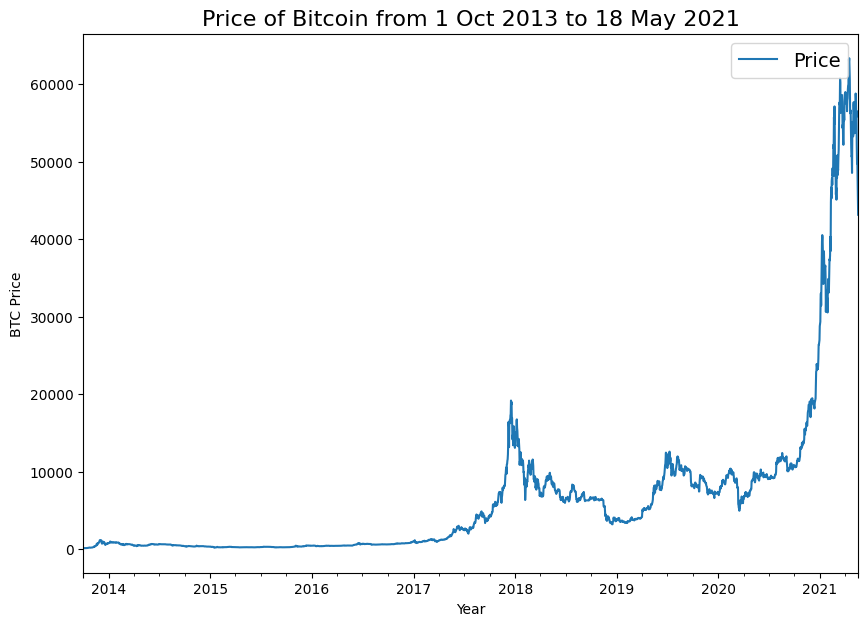

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.xlabel("Year")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)

  for row in csv_reader:
    timesteps.append(datetime.strptime(row[1], "%Y-%m-%d")) # get the dates as dates (not strings)
    btc_price.append(float(row[2])) # get the closing price as a float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

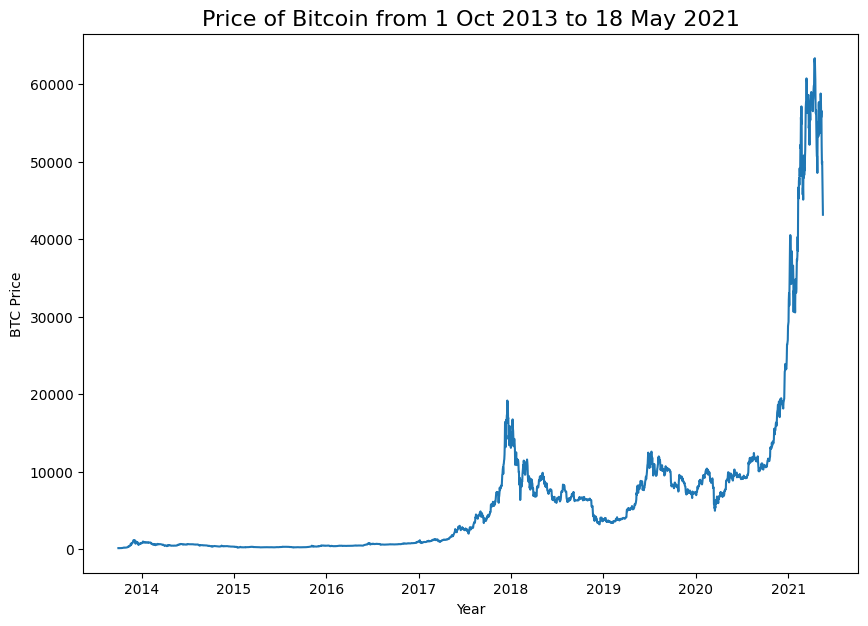

In [ ]:
# Plot from CSV
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Year")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16);

## Format Data Part 1: Create train and test sets

### Creating train and test sets with time series data (the wrong way)

In [ ]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

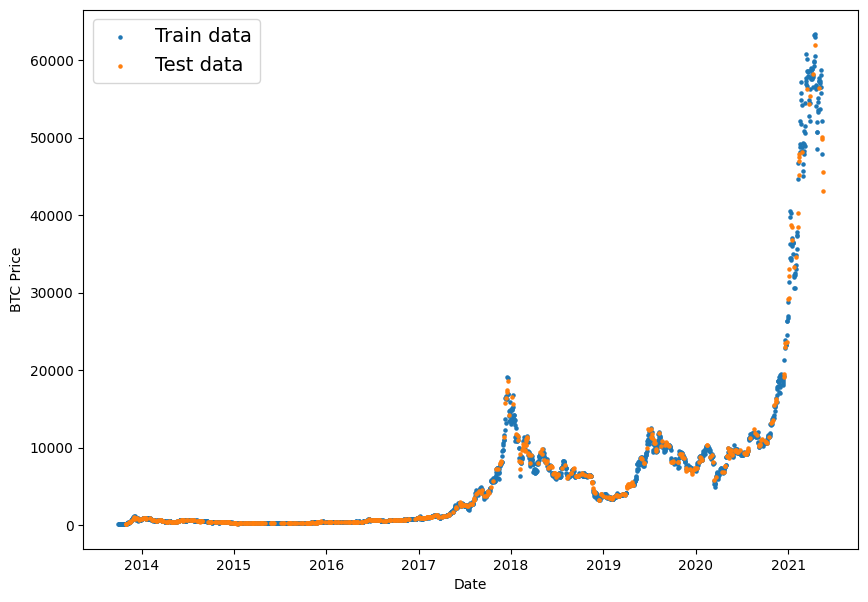

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Creating train & test sets for time series (the right way)

In [ ]:
# Create train and test splits
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test and data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

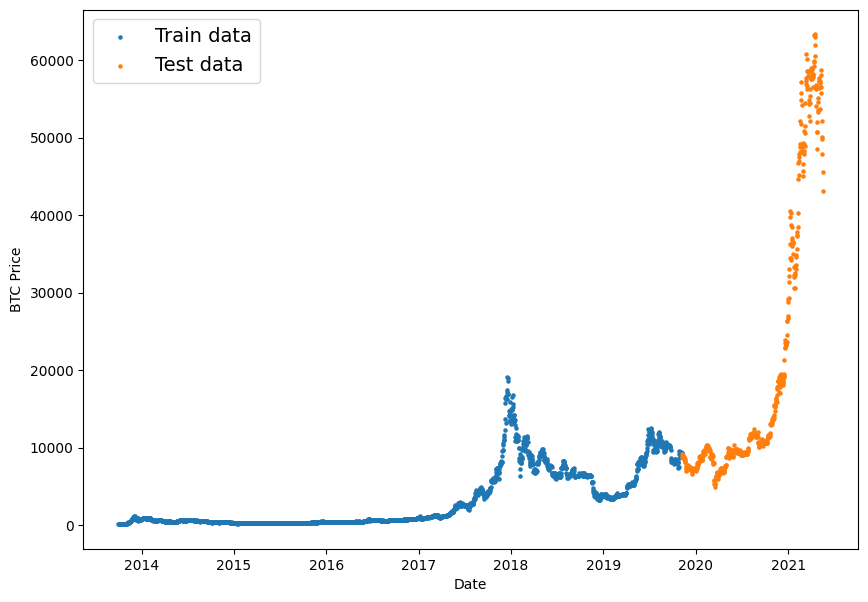

In [ ]:
# Plot splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## Create a plotting function

Typing plotting code is tedius, let's functionize it.

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

In [ ]:
len(X_train), len(y_train)

(2229, 2229)

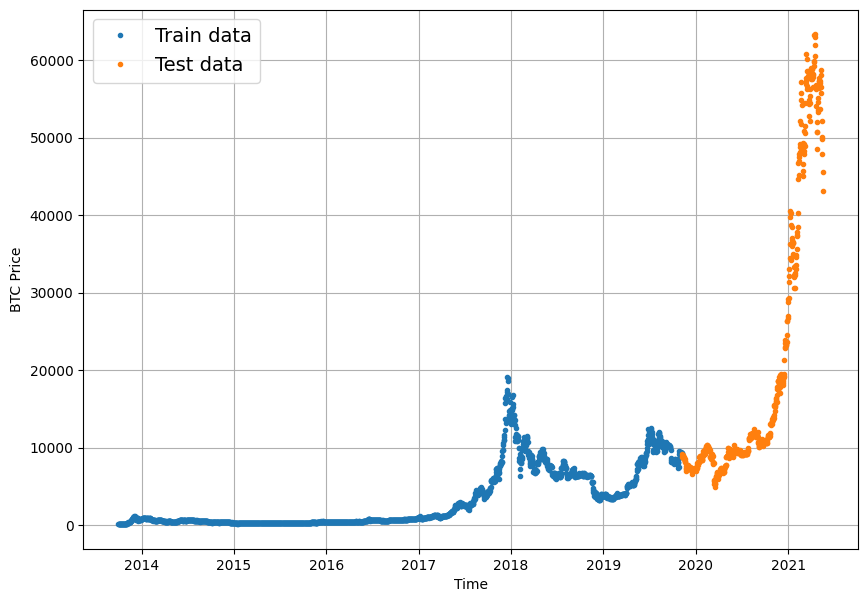

In [ ]:
# Test our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modeling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict horizon

Modelling experiments we're running:
* 0 Naïve model (baseline)
* 1 Dense model, horizon = 1, window = 7
* 2 Same as 1, horizon = 1, window = 30
* 3 Same as 1, horizon = 7, window = 30
* 4 Conv1D
* 5 LSTM
* 6 Same as 1 (but with multivariate data)
* 7 N-BEATS Algorithm
* 8 Ensemble (multiple models optimized on different loss functions)
* 9 Future prediction model (model to predict future values)
* 10 Same as 1 (but with turkey data introduced)

## Model 0: Naive forecast (baseline)

Naive Bitcoin forecasting is a basic method that uses historical Bitcoin prices to make predictions. It operates on the assumption that the future price will be the same as the most recent price available in the data.

This approach is easy to apply and provides a quick initial estimate. However, it's important to note that naive forecasting doesn't account for complex factors like market trends, news events, or underlying patterns, which can lead to less accurate predictions when compared to more sophisticated forecasting methods,

The formula looks like this:
$$\hat{y}_{t} = y{t-1}$$

In English:
> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [ ]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

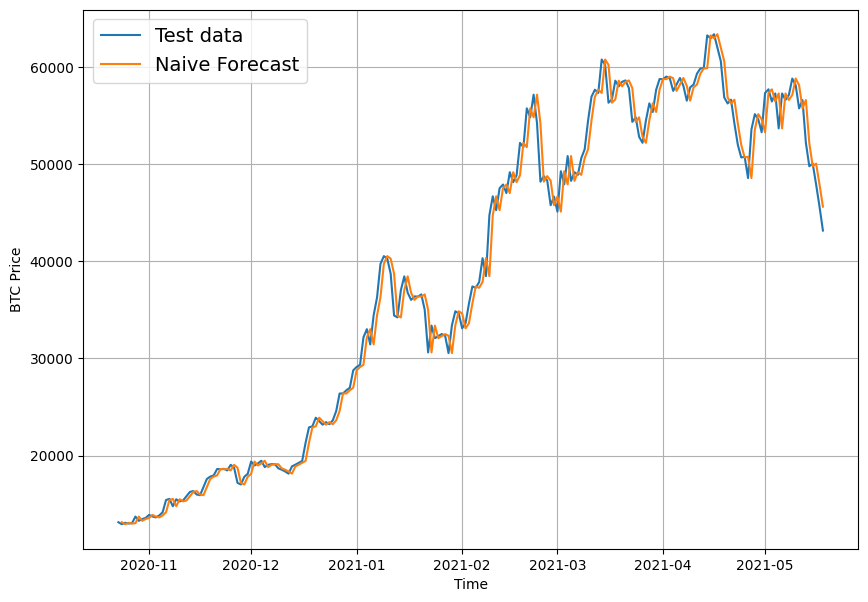

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-",label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast,start=350, format="-", label="Naive Forecast")

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

The lower the value is, the better.

The main thing we're evaluating here is: **How do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?**


In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9995699939182624

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metics
def evaluate_preds(y_true, y_pred):
  """
  Return a dictionary of evaluation metrics
  """
  # Make sure float32 dtype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  metrics = {"mae": mae.numpy(),
             "mse": mse.numpy(),
             "rmse": rmse.numpy(),
             "mape": mape.numpy(),
             "mase": mase.numpy()}

  return metrics

Let's now test and see if our method can evaluate our baseline.

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

The mae here tells us that on average, our baseline is $567 off from the actual value.

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [ ]:
len(y_train)

2229

In [ ]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [ ]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [ ]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """

  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test our the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label.numpy())}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops however, for a large time series dataset, the run time will be too slow.

To speed things up, we'll leverage [NumPy's array indexing](https://numpy.org/doc/stable/user/basics.indexing.html).

Our function will do the following steps:
1. Create a window step of a specific window size (e.g. [0, 1, 2, 3, 4, 5, 6]).

2. Use NumPy indexing to create a 2D array of multiple window steps, for example:

```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin).

4. Uses our `get_labelled_windows()` function we created above to turn the windows steps into windows with a specified horizon.

> The function we're about to create has been adapted from the following [article](https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5).

In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexs = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexs, window_indexs.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexs]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

Essentially here is what is going on in this method:

Let's say we have the following setup:
* `x` is your data array, let's assume it's `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* window_size is 3.
* horizon is 1.

First, we create window_step:
* `window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)`
* This results in `window_step = [[0, 1, 2, 3]]`. This is a template for a single window.

Now, let's look at the critical part: creating the `window_indexs` array.

1. Calculate Number of Windows:

* `len(x) - (window_size + horizon - 1)` calculates how many windows we can create.
* For our `x`, this is 10 - (3 + 1 - 1) = 7. So, we can create 7 windows.

2. Starting Indices for Each Window:

* `np.arange(len(x)-(window_size+horizon-1))` creates an array of starting indices.
* In our case, this is `[0, 1, 2, 3, 4, 5, 6]`.

3. Expanding and Transposing:

We convert this to a 2D column vector: `[[0], [1], [2], [3], [4], [5], [6]]`.

4. Adding Window Indices:

* Now, for each start index, we add the `window_step`.
* When we add `[[0, 1, 2, 3]]` to `[[0], [1], [2], [3], [4], [5], [6]]`, it's like adding 0 to the first row, 1 to the second row, and so on.

This addition works due to broadcasting in NumPy. The `window_step` is added to each row of the start indices array. The result is:

```
[
 [0+0, 0+1, 0+2, 0+3],
 [1+0, 1+1, 1+2, 1+3],
 [2+0, 2+1, 2+2, 2+3],
 ...
 [6+0, 6+1, 6+2, 6+3]
]
```

Which can further be simplified to:
```
[
 [0, 1, 2, 3],
 [1, 2, 3, 4],
 [2, 3, 4, 5],
 ...
 [6, 7, 8, 9]
]
```

Each row in this final array is a set of indices that corresponds to a window in your data x. For instance, the first row `[0, 1, 2, 3]` tells you that the first window should contain the elements `x[0], x[1], x[2], x[3]`, which are `[0, 1, 2, 3]`.

In [ ]:
# window_step = np.expand_dims(np.arange(8), axis=0)
# window_step

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


> **Note:** There's a function that does something similar to the above in `tf.keras.preprocessing` which can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array).

## Turning windows into training and test sets

In [ ]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train and 20% test

  # Create training set
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  # Create testing set
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [ ]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [ ]:
train_labels[:-HORIZON-1]

array([[ 123.033     ],
       [ 124.049     ],
       [ 125.96116   ],
       ...,
       [9369.62808116],
       [9326.59962378],
       [9335.75240233]])

In [ ]:
train_labels[-10:]

array([[9225.99547934],
       [9131.41063031],
       [9197.63234462],
       [9290.89660239],
       [9202.41545055],
       [9369.62808116],
       [9326.59962378],
       [9335.75240233],
       [9226.48582088],
       [8794.35864452]])

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example, if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following:
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint


In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128

Why these values?

These values were picked from experimentation.

* **Hyperparameters** = values a machine learning practitioner can adjust themselves
* **Parameters** = values a model learns on its own

In [ ]:
from tensorflow import keras
from keras import layers

# Set random seed to reproduce results
tf.random.set_seed(42)

# 1. Consturct the model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# 2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
history = model_1.fit(x=train_windows,
                      y=train_labels,
                      epochs=100,
                      verbose=1,
                      batch_size=128,
                      validation_data=(test_windows, test_labels),
                      callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 6s 95ms/step - loss: 1842.9348 - mae: 1842.9348 - mse: 9875470.0000 - val_loss: 1976.8651 - val_mae: 1976.8651 - val_mse: 9177511.0000
Epoch 2/100
18/18 [==============================] - 1s 45ms/step - loss: 309.6615 - mae: 309.6615 - mse: 380586.5625 - val_loss: 1387.5350 - val_mae: 1387.5350 - val_mse: 5012187.5000
Epoch 3/100
18/18 [==============================] - 1s 52ms/step - loss: 214.3476 - mae: 214.3476 - mse: 224082.1562 - val_loss: 1046.2606 - val_mae: 1046.2606 - val_mse: 3539791.0000
Epoch 4/100
18/18 [==============================] - 1s 50ms/step - loss: 185.9826 - mae: 185.9826 - mse: 180115.7500 - val_loss: 1008.3243 - val_mae: 1008.3243 - val_mse: 3402661.7500
Epoch 5/100
18/18 [==============================] - 1s 54ms/step - loss: 179.7442 - mae: 179.7442 - mse: 172247.0312 - val_loss: 1002.8987 - val_mae: 1002.8987 - val_mse: 3236571.7500
Epoch 6/100
18/18 [==============================] - 1s 69ms/step - loss

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 623.0991 - mae: 623.0991 - mse: 1280242.3750


[623.09912109375, 623.09912109375, 1280242.375]

In [ ]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 573.9113 - mae: 573.9113 - mse: 1186394.6250


[573.9112548828125, 573.9112548828125, 1186394.625]

## Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only pseudo forecasts because actual forecasts are into the future.), let's write a function to:

1. Take in a trained model
2. Takes in some input data (the same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1d array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10], len(model_1_preds)

18/18 [==============================] - 0s 2ms/step


(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8878.352, 8766.737, 9047.672, 8795.976, 8706.521, 8783.352,
        8687.99 , 8510.261, 8478.368, 8532.557], dtype=float32)>,
 556)

In [ ]:
test_labels.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 573.91125,
 'mse': 1186394.6,
 'rmse': 1089.2174,
 'mape': 2.5553186,
 'mase': 1.0082031}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

The mae in `model_1` did not perform as well as the naive_results since the mae is higher. Let's plot our `model_1` predictions so we can visualize them.

In [ ]:
test_labels.shape, test_windows.shape

((556, 1), (556, 7))

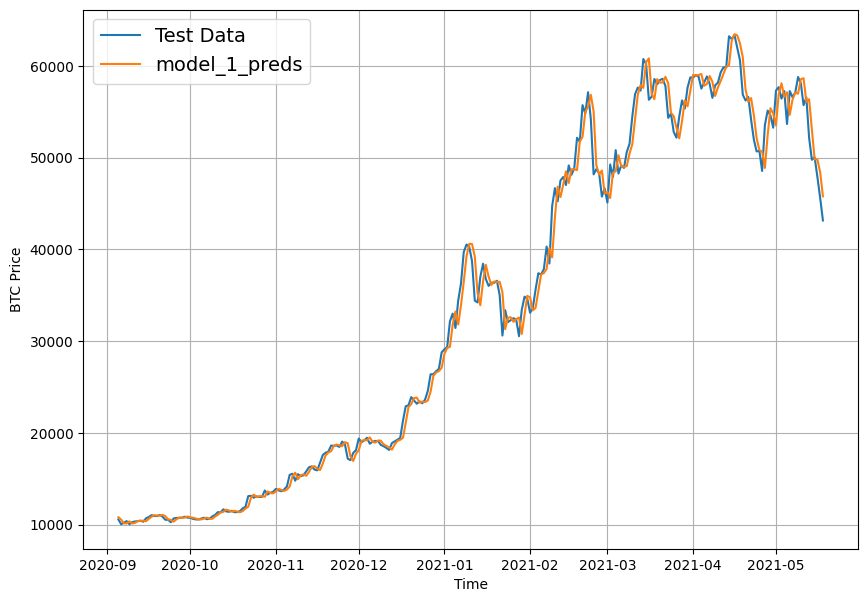

In [ ]:
# Let's plot our model 1 predictions
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], # start at the -556 index and include all going back
                 values=test_labels[:, 0],
                 start=offset,
                 format="-",
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [ ]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model 2
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

# 2. Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 3. Fit the model
history_2 = model_2.fit(train_windows,
                        train_labels,
                        epochs=100,
                        batch_size=128,
                        verbose=0,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 604.7626


604.7626342773438

In [ ]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 604.7626


604.7626342773438

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_2_preds.shape, test_labels.shape

(TensorShape([552]), (552, 1))

In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 604.7626,
 'mse': 1228286.1,
 'rmse': 1108.2808,
 'mape': 2.7903318,
 'mase': 1.0571309}

In [ ]:
model_1_results

{'mae': 573.91125,
 'mse': 1186394.6,
 'rmse': 1089.2174,
 'mape': 2.5553186,
 'mase': 1.0082031}

So `model_2` with a window size of 30 did not perform better since it was not able to beat the metrics of `model_1` .

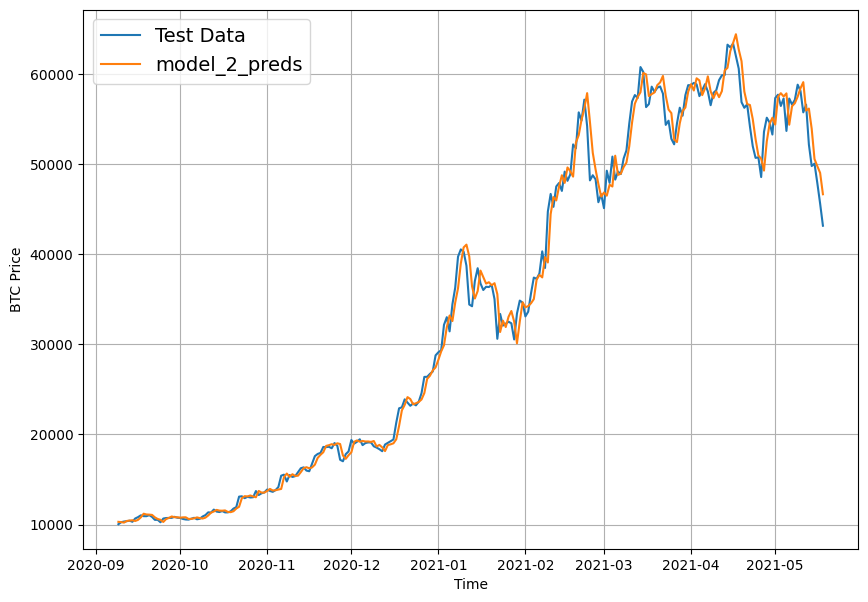

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window when plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format="-",
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format="-",
                 label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [ ]:
# Change horizion and window_size parameters
HORIZON = 7
WINDOW_SIZE = 30

# Create new windowed and label data
full_windows, full_labels = make_windows(prices,
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
# Create new training data
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_3_dense")

# 2. Compile the model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 3. Fit the model
history_3 = model_3.fit(train_windows,
                        train_labels,
                        batch_size=128,
                        epochs=100,
                        verbose=1,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_3.name)])

Epoch 1/100
18/18 [==============================] - 1s 35ms/step - loss: 1193.6735 - val_loss: 3116.6064
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 497.9802 - val_loss: 2274.3413
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 384.6189 - val_loss: 2046.1774
Epoch 4/100
18/18 [==============================] - 0s 28ms/step - loss: 355.1677 - val_loss: 1857.4229
Epoch 5/100
18/18 [==============================] - 0s 25ms/step - loss: 331.7645 - val_loss: 1798.7755
Epoch 6/100
18/18 [==============================] - 0s 25ms/step - loss: 316.0016 - val_loss: 1773.9580
Epoch 7/100
18/18 [==============================] - 0s 25ms/step - loss: 300.3924 - val_loss: 1530.3198
Epoch 8/100
18/18 [==============================] - 0s 24ms/step - loss: 288.8045 - val_loss: 1505.6362
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 278.8840 - val_loss: 1673.4791
Epoch 10/100
18/18 [==============================] - 0

In [ ]:
# Evaluate model_3 on test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1307.3239


1307.3238525390625

In [ ]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1242.7325


1242.7325439453125

In [ ]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9099.293, 9423.219, 9374.475, 9519.49 , 9581.897, 9383.432,
        9382.063],
       [8672.523, 8950.252, 9003.902, 9353.934, 9167.192, 8950.88 ,
        9005.712],
       [8529.572, 8770.096, 8716.261, 9261.693, 9052.481, 8982.425,
        9009.464],
       [8791.131, 9219.828, 9096.871, 9351.441, 9099.24 , 9226.614,
        9248.421],
       [8745.559, 9092.369, 8924.894, 9175.325, 9068.817, 9204.964,
        8877.882]], dtype=float32)>

In [ ]:
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8889.441, 8985.156, 8771.899, 8555.294, 8512.678], dtype=float32)>

In [ ]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 601.6235  ,  336.93024 ,  369.2108  ,  521.055   ,  462.86328 ,
         525.67755 ,  572.0678  ,  501.66147 ,  472.31174 ,  597.5306  ,
         806.9279  ,  778.5167  ,  797.92    ,  790.6105  ,  582.3483  ,
         264.69476 ,  195.3948  ,  268.56137 ,  259.74637 ,  227.92822 ,
         190.73283 ,  244.63379 ,  379.77267 ,  380.0053  ,  150.15074 ,
         114.443985,  107.378136,  102.779434,  144.66092 ,  279.73953 ,
         379.16916 ,  416.85895 ,  373.21826 ,  391.0477  ,  304.97516 ,
         323.97153 ,  361.71988 ,  256.03033 ,  273.41852 ,  205.58035 ,
         474.94586 ,  113.252304,   70.603584,  120.99239 ,  159.53104 ,
         125.222374,   78.60156 ,   97.663086,   98.89474 ,  133.47244 ,
         127.981514,  206.87863 ,  224.41553 ,  200.07219 ,  300.31076 ,
         330.8611  ,  556.03107 ,  480.50558 ,  433.15533 ,  540.8162  ,
         354.16183 ,  253.2615  ,  276.61377 ,  416.18793 ,  346.06412 ,
         510.58636 ,  524.24866 ,  570.0694 

As you can see there is a shape mismatch in our `model_3_results` since model_3 has an output of 7 now instead of 1 since we set our `HORIZON` parameter to 7. In order to fix this, we need to fix our method that evaluates our model.

## Make our evaluation function work for larger horizons.

In [ ]:
model_3_results["mae"].ndim

1

In [ ]:
model_2_results["mae"].ndim

0

In [ ]:
tf.reduce_mean(model_3_results["mae"]).numpy()

1242.7323

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metics
def evaluate_preds(y_true, y_pred):
  """
  Return a dictionary of evaluation metrics
  """
  # Make sure float32 dtype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae) # computes the mean along all axis and condenses it down to a scalar
                              # to properly calculate it along our metrics and now we repeat for rest
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  metrics = {"mae": mae.numpy(),
             "mse": mse.numpy(),
             "rmse": rmse.numpy(),
             "mape": mape.numpy(),
             "mase": mase.numpy()}

  return metrics

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1242.7323,
 'mse': 5326531.0,
 'rmse': 1431.5243,
 'mape': 5.6437564,
 'mase': 2.211373}

In [ ]:
model_2_results

{'mae': 604.7626,
 'mse': 1228286.1,
 'rmse': 1108.2808,
 'mape': 2.7903318,
 'mase': 1.0571309}

Now we can properly view `model_3_results` and its mae is worse than `model_2` however, we need to keep in mind that `model_3` is predicing on a larger horizon of 7.

What this means in terms of our Bitcoin data is that `model_3` trying to predict the price of Bitcoin for the next 7 days while `model_2` was only predicting the next day.

The further we try to predict the future, the more errors there will be.

With that being said, let's go ahead and visualize `model_3` predictions.

In [ ]:
test_labels[:, 0]

array([ 8794.35864452,  8798.04205463,  9081.18687849,  8711.53433917,
        8760.89271814,  8749.52059102,  8656.97092235,  8500.64355816,
        8469.2608989 ,  8537.33965197,  8205.80636599,  8118.4885358 ,
        8074.84317361,  7612.7405735 ,  7262.11053495,  7303.40575852,
        7041.73293642,  7211.86180875,  7141.06944869,  7523.4806726 ,
        7390.20746923,  7729.26593894,  7542.23560864,  7381.96300782,
        7333.43293049,  7315.36776456,  7213.73376172,  7398.78704961,
        7511.88058312,  7532.12351309,  7550.23919987,  7333.09604316,
        7239.76257544,  7198.06667705,  7190.27236926,  7238.87432299,
        7087.02498535,  7112.73147612,  6883.49639377,  6584.02884335,
        7424.01540023,  7147.56832379,  7139.93337053,  7286.33508116,
        7236.98620461,  7166.17237853,  7235.6266505 ,  7212.80939522,
        7183.70653603,  7227.29371168,  7311.56064392,  7385.46484791,
        7251.27679432,  7179.95781929,  7174.74401195,  6955.48757967,
      

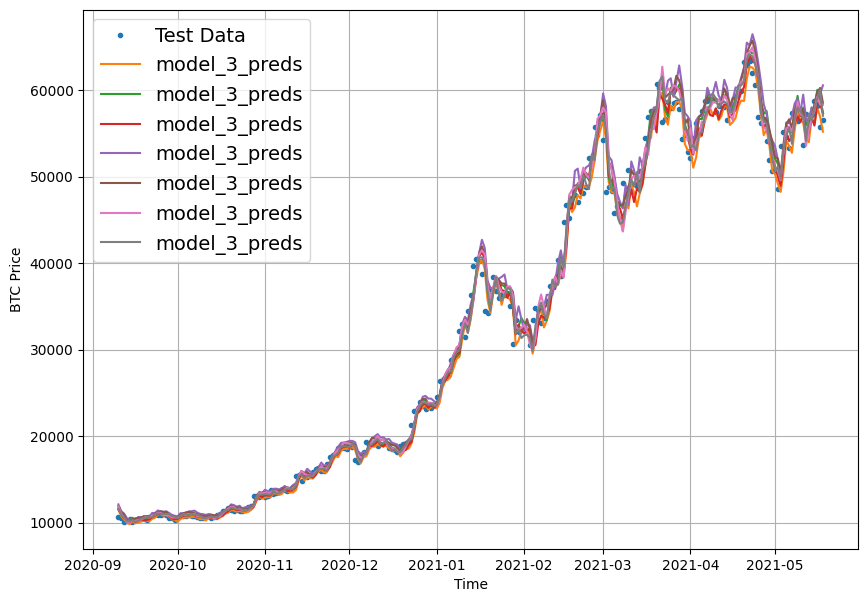

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_3_preds,
                 start=offset,
                 format="-",
                 label="model_3_preds")

Since our plot looks a little funky, we need to aggregate our `model_3_preds` in order to plot this properly. However, in the process of condensing `model_3_preds`, we will lose some information since these predictions were across 7 days.

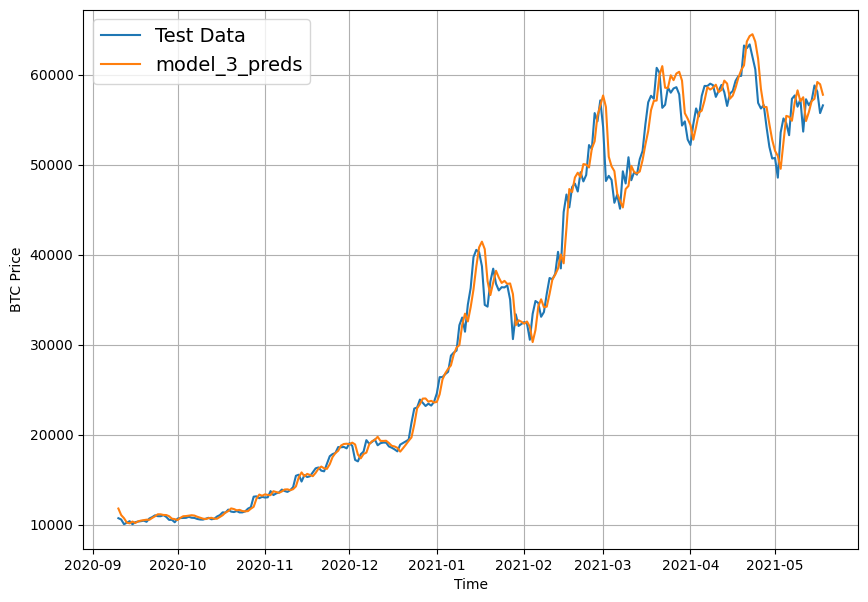

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format="-",
                 label="Test Data")

# This time aggregate model_3_preds by using tf.reduce_mean()
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format="-",
                 label="model_3_preds")

## Which of the following of our models is performing the best so far?

So we've trained a few models, now let's compare them and see how they've gone.

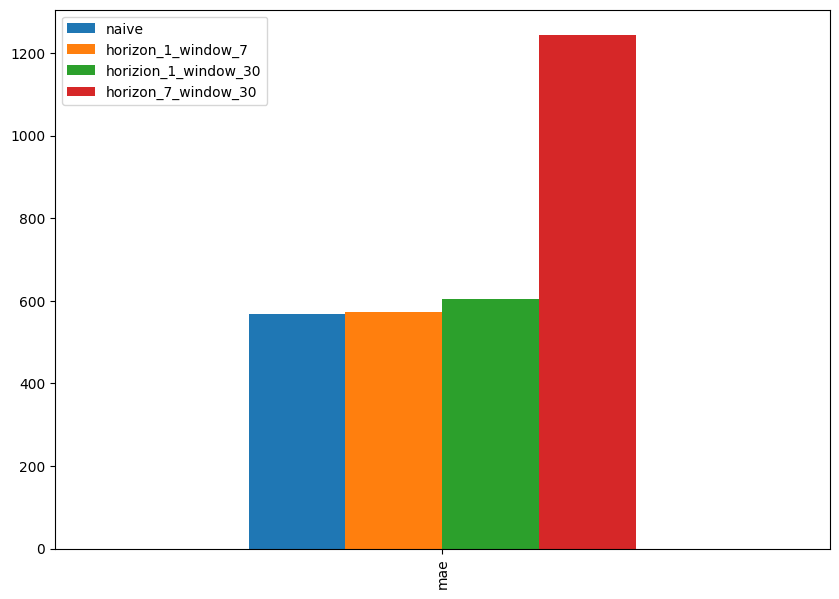

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizion_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar");

From the graph, the naive results have performed the best since it has the lowest mae. The naive results have performed the best due to the presence of autocorrelation in our data.

Autocorrelation, in the context of predicting Bitcoin prices, means that the price of Bitcoin today can give you clues about what its price might be tomorrow or in the future. If Bitcoin prices have high autocorrelation, it suggests that past prices are a good indicator of future prices.

## Model 4: Conv1D

In [ ]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices,
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

To use the Conv1D layer, We need an input shape of: `(batch_size, timesteps, input_dim)`.

However, our data is not in that shape yet.

In [ ]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE)

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [ ]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


From this, we need to use a lambda layer in order for our model to utilize a Conv1D layer.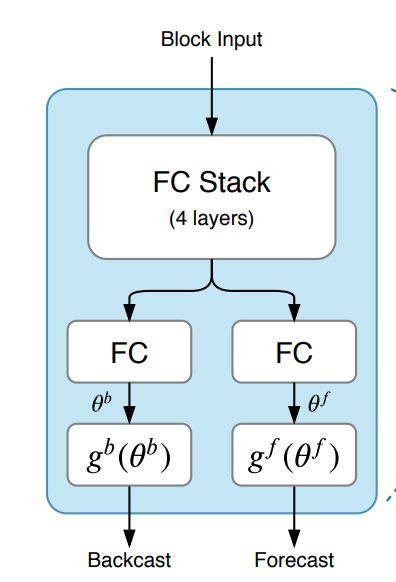

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128,
                  kernel_size=WINDOW_SIZE,
                  strides=1,
                  padding="causal", # causal padding is good for temporal data
                  activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

# 2. Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 3. Fit the model
history_4 = model_4.fit(train_windows,
                        train_labels,
                        batch_size=128,
                        epochs=100,
                        verbose=1,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - 4s 49ms/step - loss: 1634.8263 - val_loss: 1038.5491
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 332.4622 - val_loss: 1651.6084
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 227.7959 - val_loss: 1058.0647
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 194.2704 - val_loss: 1048.2542
Epoch 5/100
18/18 [==============================] - 1s 53ms/step - loss: 186.4623 - val_loss: 1032.0178
Epoch 6/100
18/18 [==============================] - 1s 49ms/step - loss: 183.8963 - val_loss: 1026.6904
Epoch 7/100
18/18 [==============================] - 1s 39ms/step - loss: 182.4497 - val_loss: 1000.2293
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 177.6756 - val_loss: 1004.3719
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 175.3347 - val_loss: 1006.6172
Epoch 10/100
18/18 [==============================] - 1s 46

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6529 (25.50 KB)
Trainable params: 6529 (25.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 11ms/step - loss: 657.5205


657.5205078125

In [ ]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 572.9781


572.9781494140625

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8890.954, 8774.384, 9013.114, 8791.309, 8720.292, 8754.26 ,
       8689.866, 8520.564, 8466.727, 8522.253], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 572.9782,
 'mse': 1188977.0,
 'rmse': 1090.4022,
 'mape': 2.5686033,
 'mase': 1.006564}

In [ ]:
model_1_results

{'mae': 573.91125,
 'mse': 1186394.6,
 'rmse': 1089.2174,
 'mape': 2.5553186,
 'mase': 1.0082031}

It looks like `model_4` slightly beat `model_1` in mae but still hasn't beat the naive forecast.


## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

We'll use the same data we created previously.

In [ ]:
train_windows.shape

(2224, 7)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Build an LSTM model with Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(units=128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs,
                         outputs=output,
                         name="model_5_LSTM")

# 2. Compile the model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 3. Fit the model
history_5 = model_5.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 117ms/step - loss: 2245.1294 - val_loss: 9494.4482
Epoch 2/100
18/18 [==============================] - 2s 133ms/step - loss: 632.9496 - val_loss: 1708.6156
Epoch 3/100
18/18 [==============================] - 2s 122ms/step - loss: 243.7469 - val_loss: 1368.2949
Epoch 4/100
18/18 [==============================] - 3s 158ms/step - loss: 184.6499 - val_loss: 989.7106
Epoch 5/100
18/18 [==============================] - 0s 15ms/step - loss: 176.6989 - val_loss: 991.1144
Epoch 6/100
18/18 [==============================] - 2s 113ms/step - loss: 176.3990 - val_loss: 976.1373
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 177.2208 - val_loss: 983.7513
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 173.7756 - val_loss: 994.8190
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 170.9312 - val_loss: 978.4040
Epoch 10/100
18/18 [==============================] - 2s 9

In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 589.7722


589.7721557617188

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8970.735, 8832.568, 8978.861, 8821.294, 8768.156], dtype=float32)>

In [ ]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 589.7721,
 'mse': 1253439.4,
 'rmse': 1119.571,
 'mape': 2.6584451,
 'mase': 1.0360662}

In [ ]:
model_1_results

{'mae': 573.91125,
 'mse': 1186394.6,
 'rmse': 1089.2174,
 'mape': 2.5553186,
 'mase': 1.0082031}

Our LSTM model `(model_5)` is still not performing better than our simple dense model `(model_1)`. This simply iterates that building a more complex model does not always guarantee better results.

## Make a multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use?

What's a better feature to use?

How about the bitcoin halving [events](https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving
)?


In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [ ]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [ ]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [ ]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2 # -1 get's last column
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


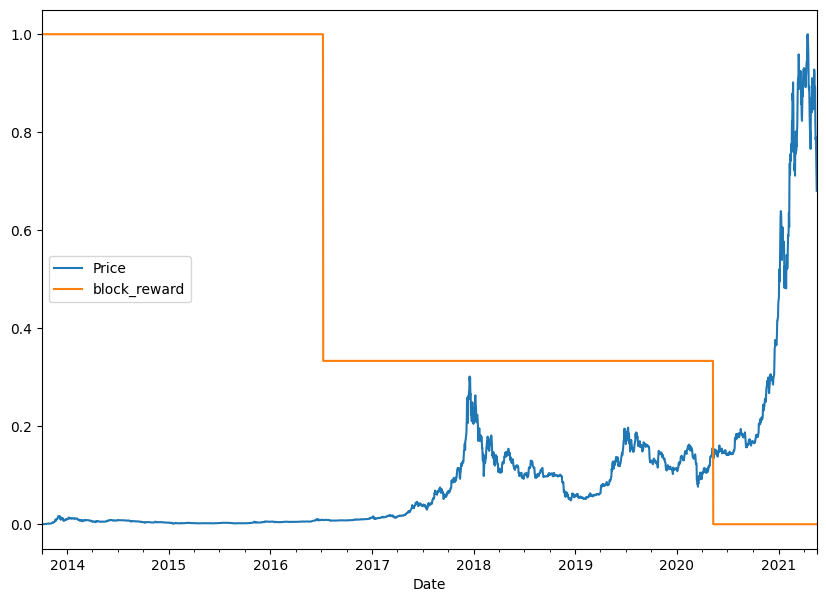

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # scale prices down so we can properly see the block reward on graph
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into a windowed dataset using the helper functions above.

However, since we've now got multivariate data, these functions won't work.

Not to worry, we can use the [pandas.DataFrame.shift()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html) method to window our multivariate data.



In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


What we've done is we created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [ ]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) # TensorFlow needs data in float32
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# 2. Compile the model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_6.fit(X_train,
            y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 37ms/step - loss: 1120.8030 - mae: 1120.8030 - val_loss: 2180.6909 - val_mae: 2180.6909
Epoch 2/100
18/18 [==============================] - 0s 27ms/step - loss: 284.5613 - mae: 284.5613 - val_loss: 1318.5369 - val_mae: 1318.5369
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 169.9132 - mae: 169.9132 - val_loss: 1033.1521 - val_mae: 1033.1521
Epoch 4/100
18/18 [==============================] - 1s 37ms/step - loss: 153.1585 - mae: 153.1585 - val_loss: 833.4269 - val_mae: 833.4269
Epoch 5/100
18/18 [==============================] - 1s 42ms/step - loss: 144.3439 - mae: 144.3439 - val_loss: 788.4070 - val_mae: 788.4070
Epoch 6/100
18/18 [==============================] - 1s 36ms/step - loss: 143.8521 - mae: 143.8521 - val_loss: 775.6437 - val_mae: 775.6437
Epoch 7/100
18/18 [==============================] - 1s 38ms/step - loss: 139.4281 - mae: 139.4281 - val_loss: 760.9793 - val_mae: 760.9793
Epoch 8/100


In [ ]:
# Evaluate multivarte model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 626.8694 - mae: 626.8694


[626.869384765625, 626.869384765625]

In [ ]:
# Load in and evaluate best perforing model
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 565.8015 - mae: 565.8015


[565.8014526367188, 565.8014526367188]

In [ ]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8833.347 , 8776.95  , 9015.692 , 8744.118 , 8757.724 , 8743.07  ,
       8637.7705, 8541.505 , 8445.67  , 8517.302 ], dtype=float32)>

In [ ]:
# Evalaute predictions to get evaluation metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 565.8015,
 'mse': 1158762.9,
 'rmse': 1076.4585,
 'mape': 2.5594444,
 'mase': 0.99395657}

In [ ]:
model_1_results

{'mae': 573.91125,
 'mse': 1186394.6,
 'rmse': 1089.2174,
 'mape': 2.5553186,
 'mase': 1.0082031}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

It looks like `model_6` was able to beat `model_1` and our naive forecast in mae.

## Model 7: N-BEATS Algorithm

Let's now try to build the biggest time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in Figure 1 from the following [paper](https://arxiv.org/pdf/1905.10437.pdf).







### Building and testing the N-BEATS Block Layer

Because the N-BEATS block layer does not exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow, we can use [subclassing](https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing).

In [ ]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs) # init the parent keras layer class, allowing this custom layer to inherit all the functionalities and properties of a standard keras layer
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation (this is our fully connected stack)
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs # x is going to continue to be updated as it passses through each layer in the stack
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    # The backcast takes the first part of the theta vector, up to self.input_size, which represents the model's understanding or reconstruction of the input data (i.e., the past).
    # The forecast takes the last part of the theta vector, the last self.horizon elements, which represents the model's prediction for the future.
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test our NbeatsBlock class.

To do so, we'll make some dummy inputs and outputs.

In [ ]:
# Set up dummy NbeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, #backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NbeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.38389418  0.35329175 -0.0333121  -0.11072142 -0.13326252 -0.4649477
  0.45009223]
Forecast: -0.21032658219337463


### Preparing data for the N-BEATS algorithm using `tf.data`

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the [tf.data guide](https://www.tensorflow.org/guide/data_performance).

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create N_BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range (WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to make our dataset performant using the tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (feature, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS Algorithm

The N_BEATS algorithm has a fair few number of parameters, many of them can be found in Table 18 [here](https://arxiv.org/pdf/1905.10437.pdf):

INSERT IMAGE OF HERE

Source: Table 18 (section) N-BEATS paper

In [ ]:
# Values from N_BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for the residual connections

Before we can create our N-BEATS model, we need two layers for the residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

More information on residual connections [here](https://en.wikipedia.org/wiki/Residual_neural_network).

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get ouputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling, and fitting the N-BEATS algorithm

1. Set up an instance of the N-BEATS block layer using `NBeatsBlock` (that'll be the initial block used for the network, and then the rest will be created as part of stacks).
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API).
3. Make the initial forecast and forecasts for the model with the layer created in (1).
4. Use a for loop to create stacks of block layers.
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks that return backcasts and block-level forecasts.
6. Create the double residual stacking using subtract and add layers.
7. Put the model inputs and outputs together using `tf.keras.Model()`.
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it in line with our models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper.
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving.
  * Reduce LR on Plateau - if a model stops improving, try lowering and learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)

In [ ]:
%%time

# Set seed
tf.random.set_seed(42)

# 1. Setup an instance of the NBeatBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
backcast, forecast = nbeats_block_layer(stack_input)
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # -1 since we already have an inital stack in step 3 and use _ since we only care about the indices

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                           patience=100,
                                                           verbose=1)])


Epoch 356: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 456: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 17s, sys: 3.54 s, total: 2min 20s
Wall time: 2min 43s


In [ ]:
# Evaluate N-Beats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 25ms/step - loss: 565.6628 - mae: 565.6628 - mse: 1136878.1250


[565.662841796875, 565.662841796875, 1136878.125]

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8839.2  , 8810.42 , 9010.227, 8758.909, 8800.265, 8762.266,
       8648.1  , 8513.711, 8495.077, 8502.42 ], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 565.66284,
 'mse': 1136878.1,
 'rmse': 1066.2449,
 'mape': 2.6194174,
 'mase': 0.99371296}

In [ ]:
print(f"naive_results: {naive_results}\n\nmodel_1_results: {model_1_results}\n\nmodel_6_reslts{model_6_results}\n\nmodel_7_results{model_7_results}")

naive_results: {'mae': 567.9802, 'mse': 1147547.0, 'rmse': 1071.2362, 'mape': 2.516525, 'mase': 0.99957}

model_1_results: {'mae': 573.91125, 'mse': 1186394.6, 'rmse': 1089.2174, 'mape': 2.5553186, 'mase': 1.0082031}

model_6_reslts{'mae': 565.8015, 'mse': 1158762.9, 'rmse': 1076.4585, 'mape': 2.5594444, 'mase': 0.99395657}

model_7_results{'mae': 565.66284, 'mse': 1136878.1, 'rmse': 1066.2449, 'mape': 2.6194174, 'mase': 0.99371296}


so `model_7` did beat all 3 models above, but it barely beat `model_6`.

This goes to show the power of smaller networks.  Not all larger models are better suited for certain types of data since we barely got an increase.

### Plotting the N-Beats arhitecture we've created

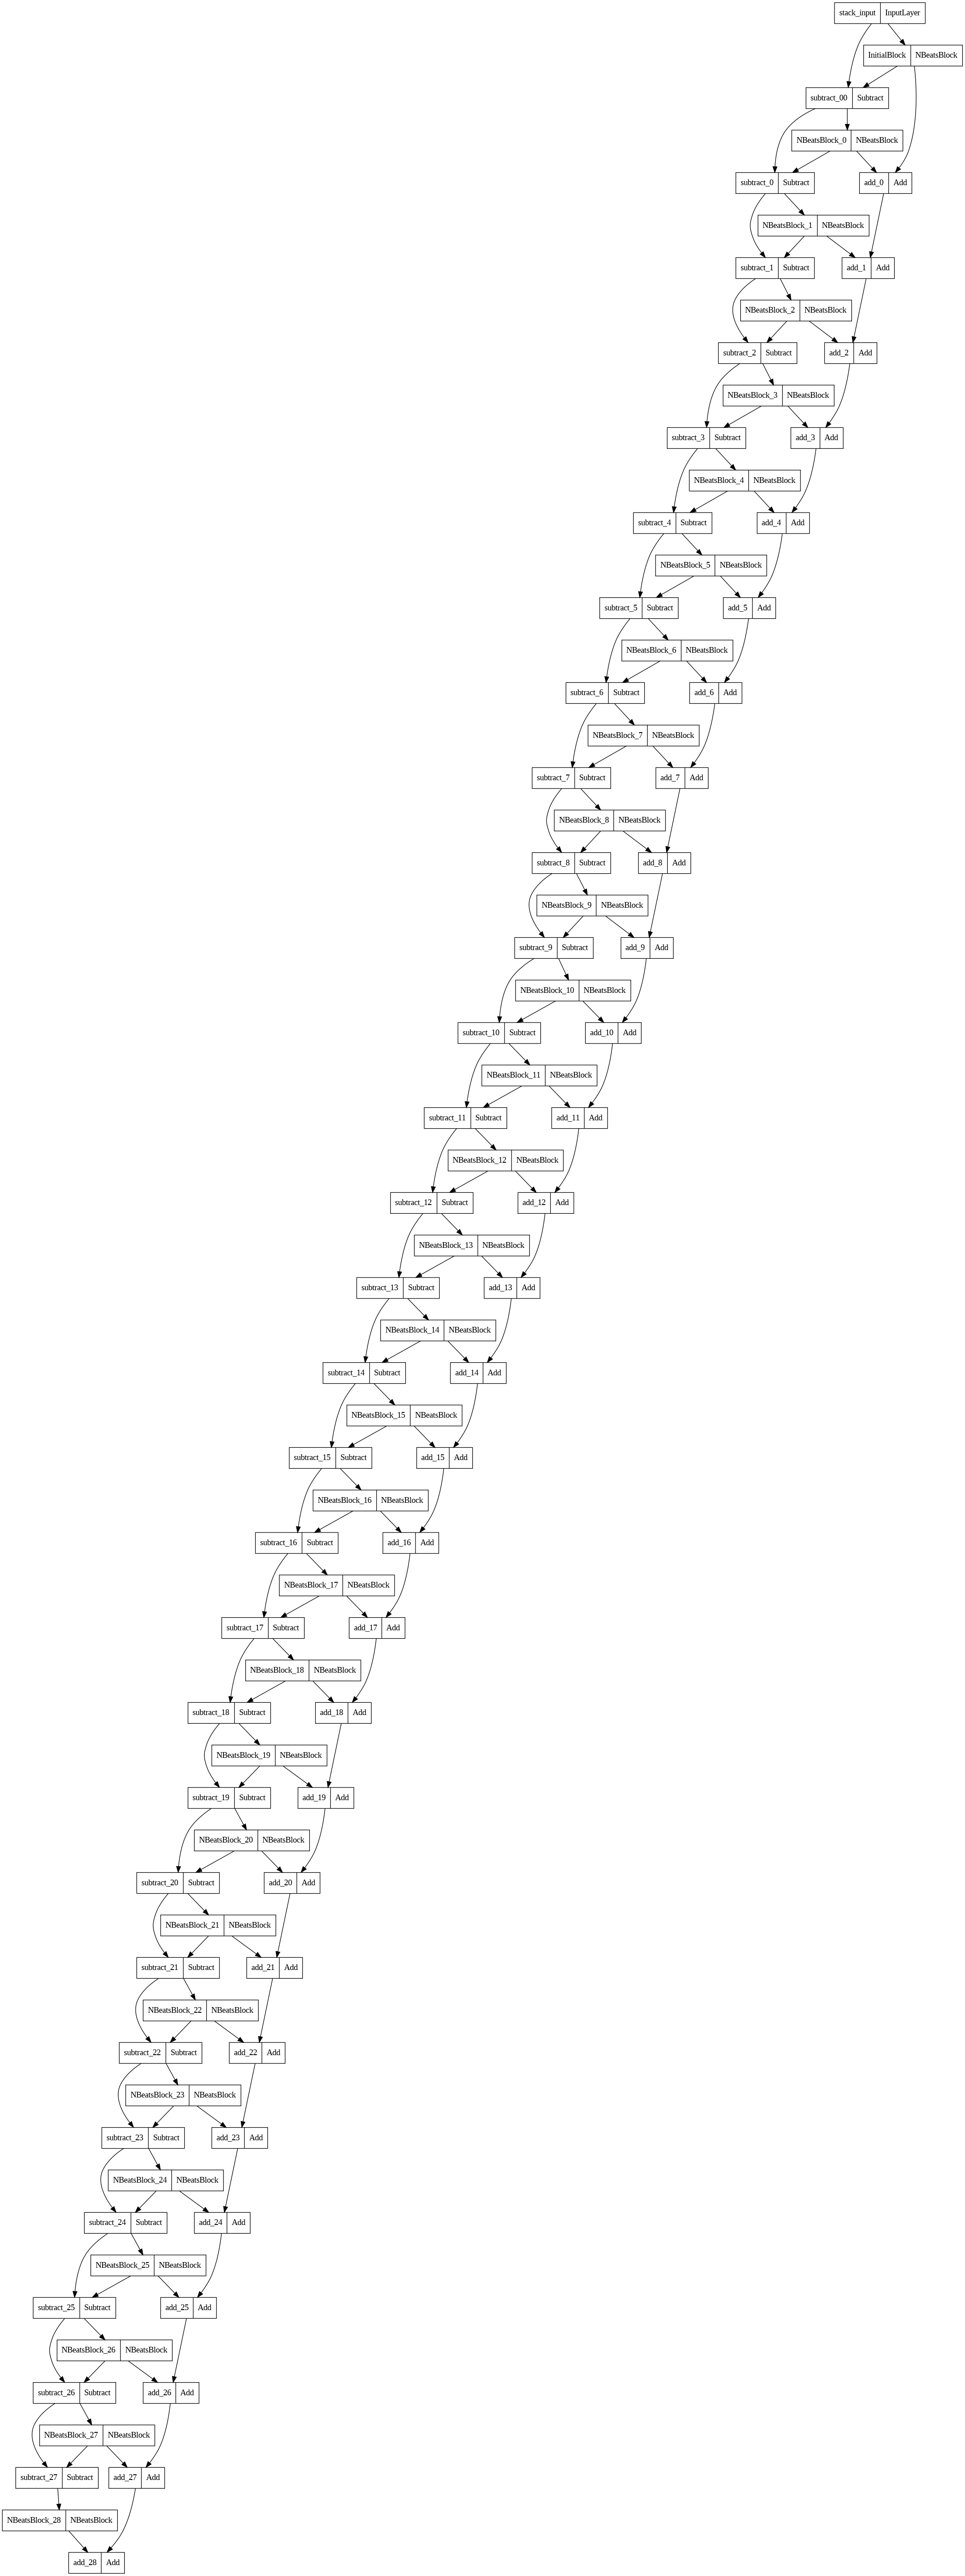

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

**Note:** To properly view this image, openthe image in a new tab and zoom in to inspect it because this is a huge model.

This just shows that even if with an advanced model, it is not always the solution to our problems.

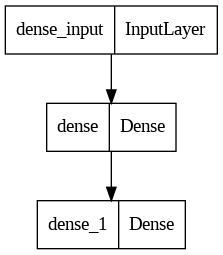

In [ ]:
plot_model(model_1)

The architecture for `model_1` is very simple compared to the architecture of `model_7.` Since `model_7` was not able to perform better than our naive results, let's try to utilize ensemble learning.

## Model 8: Creating an ensemble (stacking different models together)

An ensemble is like having a group of different experts working together to make better predictions or decisions for a shared goal. They combine their strengths to improve the outcome.

So we will  combine many *different* models to predict a common goal.

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an ensemble of models (using different loss functions)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE, and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned.
  10 * len(["mae", "mse", "mape"])
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similiar to model_1)
      model = tf.keras.Sequential([
          # Initialize dense layers with normal distribution for estimating prediction intervals later on
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 349: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 896: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 996: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 769: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 869: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 203: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 324: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 424: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 506: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 606:

In [ ]:
len(ensemble_models)

15

In [ ]:
ensemble_models

### Make predictions with our ensemble model

In [ ]:
# Create a function which uses a list of trained models to make and returns a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 40ms/step
CPU times: user 723 ms, sys: 26.2 ms, total: 750 ms
Wall time: 920 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8794.778 ,  8736.29  ,  9002.372 , ..., 50816.07  , 48777.586 ,
        46801.72  ],
       [ 8780.926 ,  8782.378 ,  9051.5205, ..., 49707.086 , 48328.438 ,
        45887.953 ],
       [ 8757.609 ,  8762.503 ,  9057.98  , ..., 50080.36  , 48873.926 ,
        46489.086 ],
       ...,
       [ 8713.883 ,  8696.286 ,  9018.408 , ..., 49438.92  , 48778.84  ,
        45288.473 ],
       [ 8718.306 ,  8827.489 ,  9065.84  , ..., 50348.074 , 47440.4   ,
        45822.406 ],
       [ 8796.017 ,  8778.755 ,  9069.521 , ..., 50396.266 , 48528.64  ,
        46270.938 ]], dtype=float32)>

Our ensemble preds came out in multiple dimensions but to combine into **point prediction**, we can leverage the mean of all our predictions or the median.

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8771.385, 8760.343, 9043.378, 8707.729, 8742.297, 8711.153,
       8648.314, 8466.821, 8441.488, 8510.61 ], dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8780.926 , 8762.503 , 9051.5205, 8717.903 , 8747.698 , 8722.526 ,
       8649.772 , 8475.952 , 8439.702 , 8506.441 ], dtype=float32)

In [ ]:
# Evaluate ensemble model predictions with ensemble_mean
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 570.187,
 'mse': 1147011.6,
 'rmse': 1070.9862,
 'mape': 2.5865238,
 'mase': 1.0016607}

In [ ]:
# Evaluate ensemble model predictions with ensemble_median
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 570.02594,
 'mse': 1153090.5,
 'rmse': 1073.8206,
 'mape': 2.583799,
 'mase': 1.0013777}

In [ ]:
model_7_results

{'mae': 565.66284,
 'mse': 1136878.1,
 'rmse': 1066.2449,
 'mape': 2.6194174,
 'mase': 0.99371296}

Our ensemble model was not able to beat `model_7` since the mae is higher.

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

So far we've been making predictions with our models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin will be \$50,000 USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of \$50,000 USD on the dot, how about \$48,000 to \$52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from several randomly initialized models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)


In [ ]:
tf.math.reduce_std(ensemble_preds, axis=0)[:70]

<tf.Tensor: shape=(70,), dtype=float32, numpy=
array([32.055363, 32.62195 , 29.3823  , 50.60255 , 44.94353 , 47.141037,
       26.51449 , 39.155823, 30.514824, 20.00571 , 38.762695, 32.093693,
       33.741314, 40.794266, 67.147125, 52.85856 , 50.68512 , 49.672146,
       53.959152, 36.307243, 45.147594, 31.924011, 37.80064 , 27.998976,
       28.472673, 25.069046, 32.1144  , 25.584164, 27.036993, 25.105183,
       26.099306, 18.612944, 20.603891, 16.325565, 19.778599, 21.908468,
       34.58049 , 19.669725, 28.845821, 32.137543, 79.23483 , 54.67847 ,
       55.142174, 52.807617, 64.88724 , 63.120255, 19.750298, 17.498894,
       25.342226, 16.95476 , 18.255117, 19.559156, 22.728603, 17.60953 ,
       14.278862, 18.373919, 38.376823, 37.742687, 30.87003 , 39.528027,
       45.486732, 55.41365 , 32.712605, 37.950546, 26.71699 , 41.787216,
       30.638649, 38.842575, 46.481983, 33.55493 ], dtype=float32)>

In [ ]:
# Find the upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomely initialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [ ]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)
lower[:50], upper[:50]

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([8708.557 , 8696.403 , 8985.789 , 8608.548 , 8654.208 , 8618.757 ,
        8596.346 , 8390.076 , 8381.68  , 8471.399 , 8111.1455, 8029.3145,
        7973.0103, 7530.3247, 7146.0054, 7196.9727, 6991.8696, 7113.163 ,
        7010.447 , 7454.8364, 7300.8003, 7680.4487, 7498.997 , 7331.4663,
        7259.7803, 7248.139 , 7122.48  , 7333.116 , 7449.793 , 7482.997 ,
        7492.511 , 7290.5005, 7179.2397, 7137.6616, 7133.5776, 7178.6895,
        7004.6035, 7053.5903, 6804.3096, 6504.0044, 7224.831 , 7040.462 ,
        7050.7827, 7149.843 , 7143.1523, 7051.0903, 7172.766 , 7169.413 ,
        7118.5444, 7175.342 ], dtype=float32)>,
 <tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([8834.213 , 8824.282 , 9100.967 , 8806.909 , 8830.386 , 8803.55  ,
        8700.283 , 8543.566 , 8501.297 , 8549.821 , 8263.096 , 8155.122 ,
        8105.276 , 7690.238 , 7409.222 , 7404.1777, 7190.555 , 7307.878 ,
        7221.9663, 7597.1606, 7477.779 , 7

In [ ]:
X_test.index[:10]

DatetimeIndex(['2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

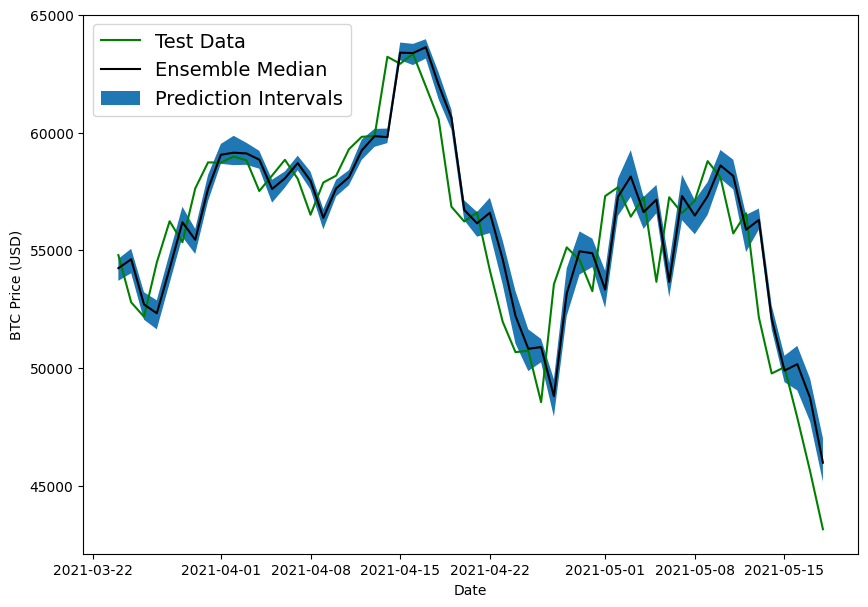

In [ ]:
# Get the median/mean of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price (USD)")
# To plot the upper and lower bounds, let's use fill_between
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

So far all of our models' predictions have been lagging behind the test data...

They're replicating what the naive model does and just predict the previous timesteps as the next timestep.'

> **Note:** These prediction intervals are estimates themselves and they have been created with the assumption that our models' data is from a normal distribution.

## Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek to qualitatively and quantitatively answer the questions:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it be helpful if a model could you that when it's making a prediction, it doesn't actually know if it's right or not?)

There are two major types of uncertainty in machine learning:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred to as "data" uncertainty or "subway" uncertainty
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it is also referred to as "model" or "coconut" uncertainty.

## Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset, however, this is only a peseudofuture.

Let's now build a model which is capable of predicting into the future.

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()
len(X_all), len(y_all)

(2780, 2780)

In [ ]:
 X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [ ]:
# Turn data into efficient running tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimital performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
# Set seed
tf.random.set_seed(42)

# Create model
model_9 = tf.keras.Sequential([
  layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
  layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_9")

# Compile the model
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
history_9 = model_9.fit(dataset_all,
                        epochs=100,
                        verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 9ms/step - loss: 1203.5743 - mae: 1203.5743
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 2301.0693 - mae: 2301.0693
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 490.8659 - mae: 490.8659
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 511.4623 - mae: 511.4623
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 1381.5453 - mae: 1381.5453
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 387.7997 - mae: 387.7997
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 1384.5392 - mae: 1384.5392
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 367.1729 - mae: 367.1729
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 1161.0996 - mae: 1161.0996
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 376.0710 - mae: 376.0710
Epoch 11/100
3/3 [===========

### Make predictions for future

**Note:** Of the time of this notebook, it is January 2024, and our data only goes up till May 2021. At the time of this, there is an updated Bitcoin data, but this can be helpful to compare the actual prices of bitcoin on the dates we will predict.



In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

To make predictions for the future we want a function that:

1. Takes an input:
  * a list of values (Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained  on (`WINDOW_SIZE`) - the model can only predict the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the function when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [ ]:
WINDOW_SIZE

7

In [ ]:
y_all[-WINDOW_SIZE:]

array([56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361, 43144.47129086])

In [ ]:
tf.expand_dims(y_all[-WINDOW_SIZE:], axis=0)

<tf.Tensor: shape=(1, 7), dtype=float64, numpy=
array([[56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361, 43144.47129086]])>

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """

  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

**How this method works:**

Let's say our data is `[1, 2, 3, 4, 5, 6, 7]`. This is the most recent data you have, and it's 7 elements long because `WINDOW_SIZE = 7`.
<br/><br/>
First Iteration:

1. The model predicts the next value based on `last_window`. Let's say this prediction is 8.
2. You append this prediction to `last_window`: `[1, 2, 3, 4, 5, 6, 7, 8]`.
3. Now, you need to ensure `last_window` has only the latest 7 elements. So, you take `[-7:]` of this array, which gives `[2, 3, 4, 5, 6, 7, 8].`
4. `last_window` is now `[2, 3, 4, 5, 6, 7, 8].`
<br/><br/>

Second Iteration:

1. The model now uses `[2, 3, 4, 5, 6, 7, 8]` to make a new prediction. Let's say it predicts 9.
2. Append 9 to the array: `[2, 3, 4, 5, 6, 7, 8, 9].`
3. Again, take the last 7 elements: `[3, 4, 5, 6, 7, 8, 9].`
4. `last_window` becomes `[3, 4, 5, 6, 7, 8, 9].`
<br/><br/>
This process repeats for each prediction. With each iteration, `last_window` is updated to always contain the 7 most recent values: the oldest one is dropped, and the newest prediction is included. Over time, as you continue making predictions, `last_window` consists more and more of the model's own predictions rather than the original historical data.

In [ ]:
# Make forecasts into the future
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 52ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 54647.390625

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 54647.390625  ] -> Prediction: 51310.3671875

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 54647.390625   51310.3671875 ] -> Prediction: 49274.3671875

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 54647.390625   51310.3671875  49274.3671875 ] -> Prediction: 48256.7265625

1/1 [==============================] - 0s 24ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 54647.390625
 51310.3671875  49274.3671875  48256.7265625 

In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


### Plot future forecasts

In [ ]:
future_forecast

[46826.46,
 42427.0,
 41737.055,
 38252.99,
 40868.297,
 36657.78,
 36574.555,
 36568.547,
 35968.418,
 33816.7,
 30668.582,
 33698.918,
 29780.64,
 31445.031]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # Specifiy start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # Specifiy end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [ ]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep, type(last_timestep)

(Timestamp('2021-05-18 00:00:00'), pandas._libs.tslibs.timestamps.Timestamp)

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
bitcoin_prices.index

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
               '2013-10-09', '2013-10-10',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=2787, freq=None)

In [ ]:
btc_price[-1]

43144.4712908603

In [ ]:
# Insert last timestep/final price into next time steps and future forecasts so the plot looks complete
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 54647.39 , 51310.367, 49274.367, 48256.727, 44655.066,
        46321.812, 45425.68 , 53306.97 , 50442.715, 47496.188, 46633.566,
        43047.9  , 47194.473, 47042.223], dtype=float32))

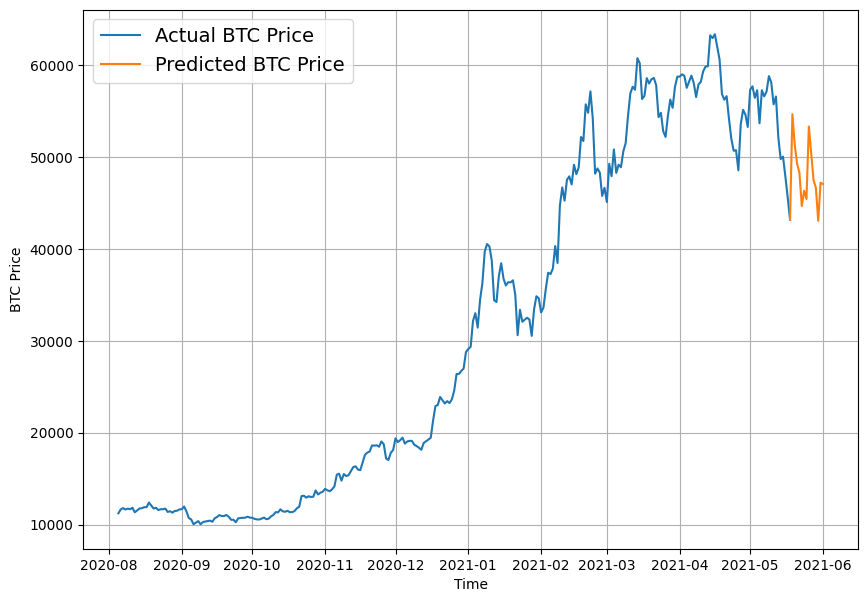

In [ ]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price");

So our model's predictions are way off from the actual Bitcoin prices from these dates. For example, on 2021-05-21, our model predicted the price of Bitcoin is \$41,737.05 when the actual amount was \$37,304.69 for the close price.

This isn't a surprise since it seems like all the models we've built are replicating our naive forecast.

## Model 10: Why forecasting is BS (The Turkey Problem)

The "Turkey Problem," is a metaphorical illustration used to explain the limitations and potential pitfalls of inductive reasoning, especially in forecasting and predicting future events.

The story involves a turkey that is fed every day by a farmer. The turkey, observing this daily pattern, concludes that the farmer will always feed it.

This conclusion, based on its past experiences, is dramatically proven wrong on the day before Thanksgiving when, instead of being fed, the turkey is killed.

So in our case, when we're trying to predict the price of Bitcoin, we've got to remember that something totally unexpected could happen. Like, there could be a day when the price just tanks out of the blue, and our model wouldn't see it coming because it's never happened before.

In [ ]:
# Let's introduce a turkey problem to our BTC data (the price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100 # Change last day of our data to simulate bitcoin price crashing out of nowhere

In [ ]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
btc_price[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 43144.4712908603]

In [ ]:
# Get the timesteps for the trukey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

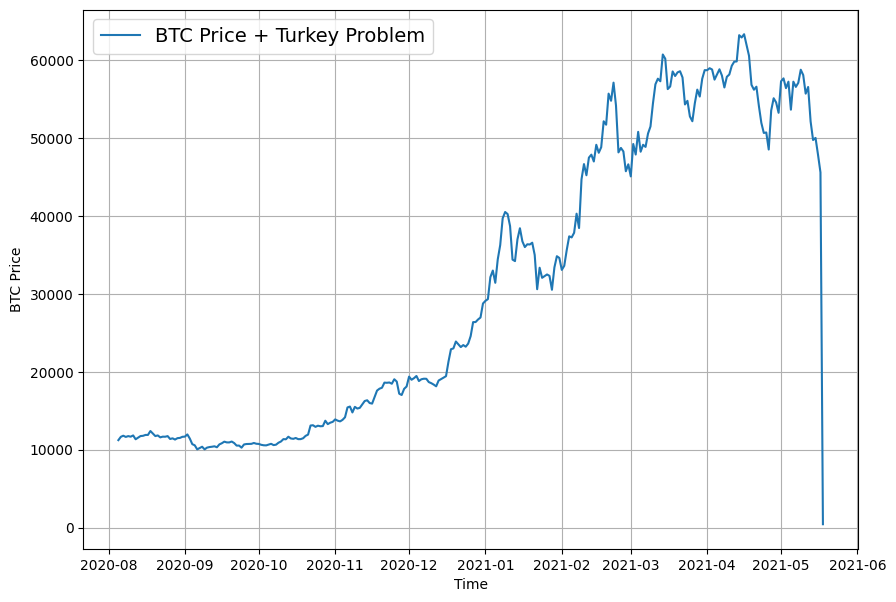

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

## Build a turkey model (model to predict on turkey)

In [ ]:
# Clone model 1 architecture for turkey model and fit turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train,
                 y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 680.6548


680.65478515625

In [ ]:
# Load best perforing model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 646.3936


646.3936157226562

In [ ]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8854.738, 8778.613, 8993.157, 8748.207, 8745.318, 8745.472,
       8643.875, 8517.331, 8458.485, 8503.162], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17125.197,
 'mse': 614165000.0,
 'rmse': 23706.53,
 'mape': 121.29158,
 'mase': 26.501297}

In [ ]:
model_1_results

{'mae': 573.91125,
 'mse': 1186394.6,
 'rmse': 1089.2174,
 'mape': 2.5553186,
 'mase': 1.0082031}

Our mae score for our turkey model is way off since our model did not see the last data point coming. To show this, let's visualize our turkey model's predictions.

In [ ]:
len(btc_timesteps_turkey), -len(y_test)

(2787, -556)

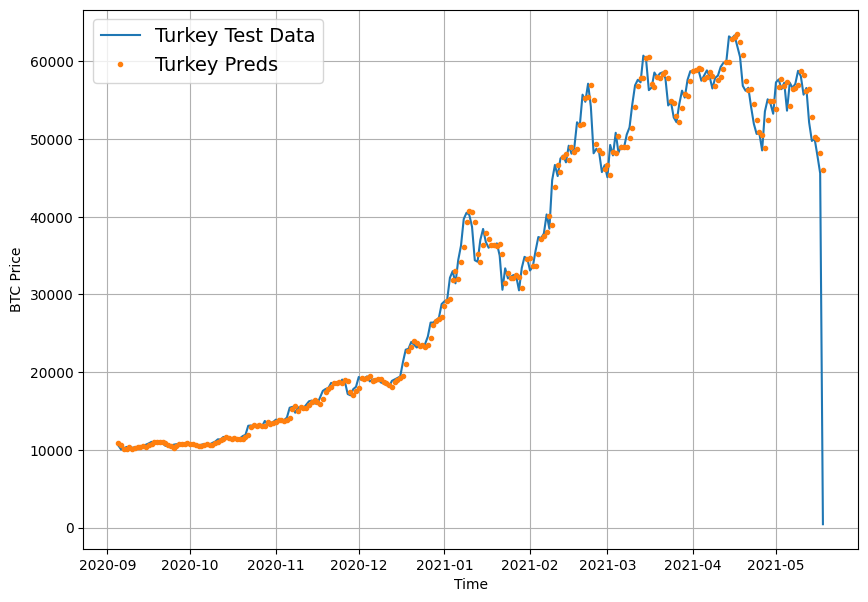

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                  values=btc_price_turkey[-len(y_test):],
                  format="-",
                  label="Turkey Test Data",
                  start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset)

So based on historical data, our model had no reason to predict the data point at the end where the price drops severely.

The model can only predict on the same distribution it was trained on which is the "Turkey Problem". A model could make correct predictions for 1000 days straight, but on day 1001, something catastrophic could happen and the model did not see it coming.

### Compare models

After a bunch of experimenting, let's compare all our models against each other.

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,573.911255,1.186395e+06,1089.217407,2.555319,1.008203
model_2_dense_w30_h1,604.762573,1.228286e+06,1108.280762,2.790332,1.057131
model_3_dense_w30_h7,1242.732300,5.326531e+06,1431.524292,5.643756,2.211373
model_4_CONV1D,572.978210,1.188977e+06,1090.402222,2.568603,1.006564
model_5_LSTM,589.772095,1.253439e+06,1119.571045,2.658445,1.036066
model_6_multivariate,565.801514,1.158763e+06,1076.458496,2.559444,0.993957
model_7_NBEATS,565.662842,1.136878e+06,1066.244873,2.619417,0.993713
model_8_ensemble,570.025940,1.153090e+06,1073.820557,2.583799,1.001378
model_10_turkey,17125.197266,6.141650e+08,23706.529297,121.291580,26.501297


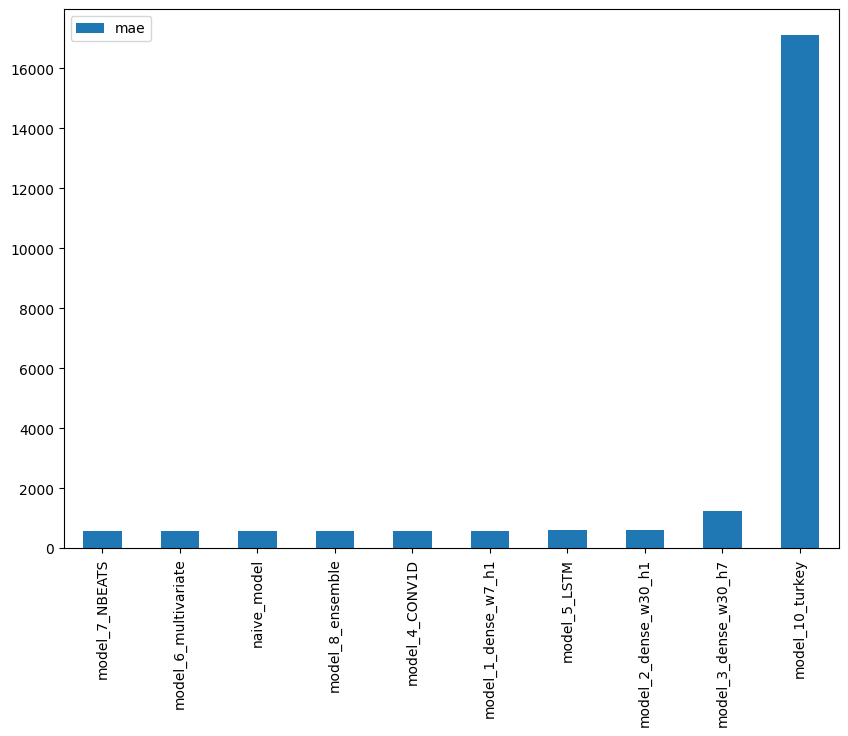

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10,7), kind="bar");

 It seems our best model with the lowest mae score (lower is better) is `model_7_NBEATS`.

## Conclusion

After a bunch of experimenting with 10 models, I have come to the conclusion that forecasting is not always possible. Some things are easier to forecast than others. For example, predicting the sunrise on a morning can be forecasted easily however, forecasting a lottery ticket number is impossible. In our case, BitCoin is just too difficult to forecast. Generally, forecasting is good based on these factors:

1. How much data is available?
2. How similar is the past to the future?
3. Whether the forecasts can affect the thing we are trying to forecast.
4. Understanding the factors that contribute to the forecast.

Playing around with different models taught me that forecasting stuff like Bitcoin isn't always spot on. It really boils down to how good your data is and if what happened before tells us anything about what might happen next. It's a handy tool, but definitely has its limits, especially with tricky things like crypto. Regardless of how things turned out, this was an interesting project. This taught me to be wary of any models that claim to predict the stock market or crypto.